# **KAIST EE**
#  **[EE488] note 01B. Maze (REINFORCE)**
## **Instructor**: Prof. Yoon, Young-Gyu (ygyoon@kaist.ac.kr)
### This example code was prepared by EE488 teaching assistants Han, Seungjae (jay0118@kaist.ac.kr) & Shin, Changyeop (scey26@kaist.ac.kr).

- Class Date : 22.03.xx.
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.

---

### 0. In this example, we will implement **REINFORCE** for solving a simple custom maze environment (see the image below). Each location corresponds to a state, and the agent needs to move up/down/left/right to move from Start to Goal.


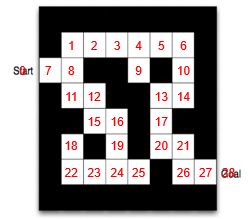

### 1. As usual, let's start with **importing libraries**!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from datetime import datetime

from matplotlib import animation
from IPython.display import HTML, clear_output

import torch
from torch.distributions import Categorical
import torch.nn as nn
import torch.nn.functional as F

from collections import deque               # this simplifies the implementation of the replay buffer

### 3. Here's our **custom environment**. It's basically the same as the maze shown above.

In [2]:
class maze_env():
# the maze shown above is scripted as a custom environment.
    def __init__(self):
        self.state = 7
        self.done = 0

    def step(self, action):
        state = self.state

        if state==0:
            if action==0:
                state, reward, done = 0, -1, 0
            elif action==1:
                state, reward, done = 0, -1, 0
            elif action==2:
                state, reward, done = 0, -1, 0
            elif action==3:                   
                state, reward, done = 7, -1, 0
            else:          
                print('action error')                
        elif state==1:
            if action==0:
                state, reward, done = 1, -1, 0
            elif action==1:
                state, reward, done = 8, -1, 0
            elif action==2:
                state, reward, done = 1, -1, 0
            elif action==3:              
                state, reward, done = 2, -1, 0
            else:          
                print('action error')                      
        elif state==2:
            if action==0:
                state, reward, done = 2, -1, 0
            elif action==1:
                state, reward, done = 2, -1, 0
            elif action==2:
                state, reward, done = 1, -1, 0
            elif action==3:                 
                state, reward, done = 3, -1, 0
            else:          
                print('action error')                      
        elif state==3:
            if action==0:
                state, reward, done = 3, -1, 0
            elif action==1:
                state, reward, done = 3, -1, 0
            elif action==2:
                state, reward, done = 2, -1, 0
            elif action==3:                
                state, reward, done = 4, -1, 0
            else:          
                print('action error')                      
        elif state==4:
            if action==0:
                state, reward, done = 4, -1, 0
            elif action==1:
                state, reward, done = 9, -1, 0
            elif action==2:
                state, reward, done = 3, -1, 0
            elif action==3:                  
                state, reward, done = 5, -1, 0
            else:          
                print('action error')                      
        elif state==5:
            if action==0:
                state, reward, done = 5, -1, 0
            elif action==1:
                state, reward, done = 5, -1, 0
            elif action==2:
                state, reward, done = 4, -1, 0
            elif action==3:                 
                state, reward, done = 6, -1, 0
            else:          
                print('action error')                      
        elif state==6:
            if action==0:
                state, reward, done = 6, -1, 0
            elif action==1:
                state, reward, done = 10, -1, 0
            elif action==2:
                state, reward, done = 5, -1, 0
            elif action==3:                   
                state, reward, done = 6, -1, 0
            else:          
                print('action error')                      
        elif state==7:
            if action==0:
                state, reward, done = 7, -1, 0
            elif action==1:
                state, reward, done = 7, -1, 0
            elif action==2:
                state, reward, done = 0, -1, 0
            elif action==3:                    
                state, reward, done = 8, -1, 0
            else:          
                print('action error')                      
        elif state==8:
            if action==0:
                state, reward, done = 1, -1, 0
            elif action==1:
                state, reward, done = 11, -1, 0
            elif action==2:
                state, reward, done = 7, -1, 0
            elif action==3:                    
                state, reward, done = 8, -1, 0
            else:          
                print('action error')                      
        elif state==9:
            if action==0:
                state, reward, done = 4, -1, 0
            elif action==1:
                state, reward, done = 9, -1, 0
            elif action==2:
                state, reward, done = 9, -1, 0
            elif action==3:                  
                state, reward, done = 9, -1, 0
            else:          
                print('action error')                      
        elif state==10:
            if action==0:
                state, reward, done = 6, -1, 0
            elif action==1:
                state, reward, done = 14, -1, 0
            elif action==2:
                state, reward, done = 10, -1, 0
            elif action==3:                 
                state, reward, done = 10, -1, 0
            else:          
                print('action error')                      
        elif state==11:
            if action==0:
                state, reward, done = 8, -1, 0
            elif action==1:
                state, reward, done = 11, -1, 0
            elif action==2:
                state, reward, done = 11, -1, 0
            elif action==3:                  
                state, reward, done = 12, -1, 0
            else:          
                print('action error')                      
        elif state==12:
            if action==0:
                state, reward, done = 12, -1, 0
            elif action==1:
                state, reward, done = 15, -1, 0
            elif action==2:
                state, reward, done = 11, -1, 0
            elif action==3:                   
                state, reward, done = 12, -1, 0
            else:          
                print('action error')                      
        elif state==13:
            if action==0:
                state, reward, done = 13, -1, 0
            elif action==1:
                state, reward, done = 17, -1, 0
            elif action==2:
                state, reward, done = 13, -1, 0
            elif action==3:                   
                state, reward, done = 14, -1, 0
            else:          
                print('action error')                      
        elif state==14:
            if action==0:
                state, reward, done = 10, -1, 0
            elif action==1:
                state, reward, done = 14, -1, 0
            elif action==2:
                state, reward, done = 13, -1, 0
            elif action==3:                   
                state, reward, done = 14, -1, 0
            else:          
                print('action error')                      
        elif state==15:
            if action==0:
                state, reward, done = 12, -1, 0
            elif action==1:
                state, reward, done = 15, -1, 0
            elif action==2:
                state, reward, done = 15, -1, 0
            elif action==3:                    
                state, reward, done = 16, -1, 0
            else:          
                print('action error')                      
        elif state==16:
            if action==0:
                state, reward, done = 16, -1, 0
            elif action==1:
                state, reward, done = 19, -1, 0
            elif action==2:
                state, reward, done = 15, -1, 0
            elif action==3:                    
                state, reward, done = 16, -1, 0
            else:          
                print('action error')                      
        elif state==17:
            if action==0:
                state, reward, done = 13, -1, 0
            elif action==1:
                state, reward, done = 20, -1, 0
            elif action==2:
                state, reward, done = 17, -1, 0
            elif action==3:                    
                state, reward, done = 17, -1, 0
            else:          
                print('action error')                      
        elif state==18:
            if action==0:
                state, reward, done = 18, -1, 0
            elif action==1:
                state, reward, done = 22, -1, 0
            elif action==2:
                state, reward, done = 18, -1, 0
            elif action==3:                    
                state, reward, done = 18, -1, 0
            else:          
                print('action error')                      
        elif state==19:
            if action==0:
                state, reward, done = 16, -1, 0
            elif action==1:
                state, reward, done = 24, -1, 0
            elif action==2:
                state, reward, done = 19, -1, 0
            elif action==3:                    
                state, reward, done = 19, -1, 0
            else:          
                print('action error')                      
        elif state==20:
            if action==0:
                state, reward, done = 17, -1, 0
            elif action==1:
                state, reward, done = 20, -1, 0
            elif action==2:
                state, reward, done = 20, -1, 0
            elif action==3:                    
                state, reward, done = 21, -1, 0
            else:          
                print('action error')                      
        elif state==21:
            if action==0:
                state, reward, done = 21, -1, 0
            elif action==1:
                state, reward, done = 26, -1, 0
            elif action==2:
                state, reward, done = 20, -1, 0
            elif action==3:                   
                state, reward, done = 21, -1, 0
            else:          
                print('action error')                      
        elif state==22:
            if action==0:
                state, reward, done = 18, -1, 0
            elif action==1:
                state, reward, done = 22, -1, 0
            elif action==2:
                state, reward, done = 22, -1, 0
            elif action==3:                    
                state, reward, done = 23, -1, 0
            else:          
                print('action error')                      
        elif state==23:
            if action==0:
                state, reward, done = 23, -1, 0
            elif action==1:
                state, reward, done = 23, -1, 0
            elif action==2:
                state, reward, done = 22, -1, 0
            elif action==3:                   
                state, reward, done = 24, -1, 0
            else:          
                print('action error')                      
        elif state==24:
            if action==0:
                state, reward, done = 19, -1, 0
            elif action==1:
                state, reward, done = 24, -1, 0
            elif action==2:
                state, reward, done = 23, -1, 0
            elif action==3:                    
                state, reward, done = 25, -1, 0
            else:          
                print('action error')                      
        elif state==25:
            if action==0:
                state, reward, done = 25, -1, 0
            elif action==1:
                state, reward, done = 25, -1, 0
            elif action==2:
                state, reward, done = 24, -1, 0
            elif action==3:                    
                state, reward, done = 25, -1, 0
            else:          
                print('action error')                      
        elif state==26:
            if action==0:
                state, reward, done = 21, -1, 0
            elif action==1:
                state, reward, done = 26, -1, 0
            elif action==2:
                state, reward, done = 26, -1, 0
            elif action==3:                 
                state, reward, done = 27, -1, 0
            else:          
                print('action error')                      
        elif state==27:
            if action==0:
                state, reward, done = 27, -1, 0
            elif action==1:
                state, reward, done = 27, -1, 0
            elif action==2:
                state, reward, done = 26, -1, 0
            elif action==3:                    
                state, reward, done = 27, 0, 1
            else:          
                print('action error')                                    
        else:          
                print('state error')             

        self.state = state
        self.done = done
                
        return state, reward, done

### 4. Let's define our **policy network**. We are going to use onehot coding for the input (why?). 

In [3]:
class policy_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(28, 4)     # 28-dimensional observation (onehot encoding)
        self.smax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.fc(x)
        x = self.smax(x)

        return x

### 5. Define a function that converts a sequence of rewards into the sequence of returns.

$$r(t) \rightarrow \sum_{t' \geq t} \gamma^{t'-t} r_{t'}$$

In [4]:
def reward2return(rewards, gamma=0.99):
    seq_length = len(rewards)
    r = torch.zeros_like(rewards, dtype = float)
    for i in range(seq_length):
        t = seq_length-1-i

        if i==0:
            r[-1] = rewards[-1]
        else:
            r[t] = gamma*r[t+1] + rewards[t]
    return r

### 6. Here are our **hyperparameters**.

In [5]:
discount = 0.99         # discount factor gamma
max_time_steps = 3000    # maximum episode length. What will happen if we decrease or increase this?

reward_recent_history = deque(maxlen=30)  # for computing average reward over 30 episodes

### 7. Let's initialize our policy network.

In [6]:
# network and optimizer
pi = policy_network()
optimizer = torch.optim.Adam(pi.parameters(), lr=0.003)

action_space = np.arange(4)

### 8. Let's test the performance of the untrained network!

In [7]:
# TEST (with untrained policy network)
env = maze_env()
rewards = 0

for t in range(max_time_steps):
    
    # choose action (by following the policy)
    state_oh = torch.from_numpy(np.eye(28)[env.state]).float()
    
    action_probs = pi(state_oh)        
    action_prob_detach = action_probs.detach().numpy()
    action = np.random.choice(action_space, p=action_prob_detach) 

    # proceed one step (in the environment) 
    state_next, reward, done = env.step(action)

    if done:
        break

    rewards = rewards + reward        


print("Total reward is " + str(rewards) + ".")

Total reward is -3000.


### 9. Define a function to **keep track of the performance**.

In [8]:
def plt_history():
    clear_output(True)
    plt.figure(figsize=[16, 9])
    plt.title("Reward history")
    plt.plot(reward_history)
    
    plt.grid()
    plt.show()

### 10. Let's start **training**! We may choose one of the followings.



*   method1 (vanilla REINFORCE): $\nabla_{\theta}J(\theta) = \sum_{t \geq 0} \color{red}{ r(\tau)} \nabla_{\theta} \log \pi_{\theta} (a_t | s_t) $
*  method2 (causality): $\nabla_{\theta}J(\theta) = \sum_{t \geq 0} \color{red}{(\sum_{t'>t}r_{t'})} \nabla_{\theta} \log \pi_{\theta} (a_t | s_t) $
*  method3 (timing): $\nabla_{\theta}J(\theta) = \sum_{t \geq 0} \color{red}{(\sum_{t'>t} \gamma^{t'-t}r_{t'})} \nabla_{\theta} \log \pi_{\theta} (a_t | s_t) $





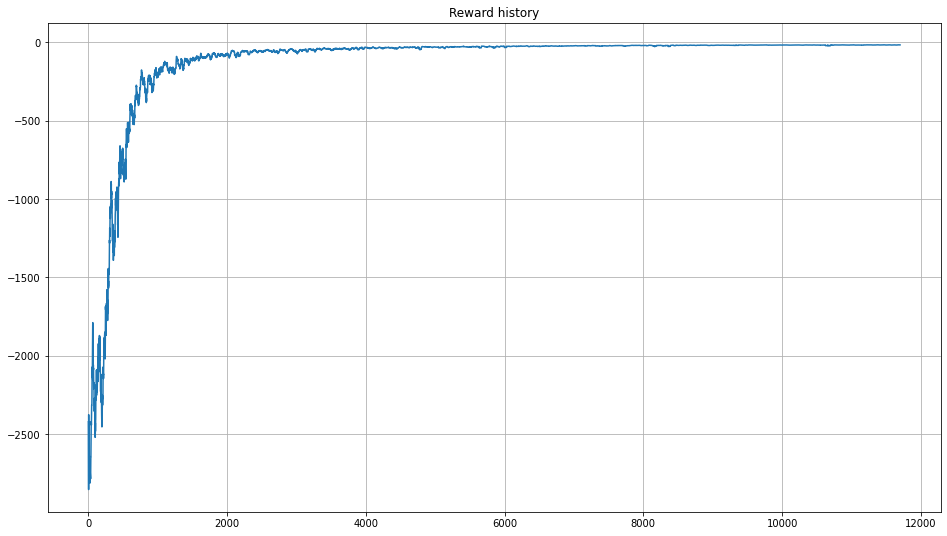

tensor(-17.)
Early stopping as the exit condition is met.


In [9]:
reward_history = []
method = 3

# define pooling layer (for moving average baseline calculation, only applies to method 4)
moving_avg = nn.AvgPool1d(41, stride=1, padding=20)

# training
for episode in range(20000):

    # initialization
    env = maze_env()
    log_probs = torch.zeros(max_time_steps)
    rewards = torch.zeros(max_time_steps)

    # loop until an episode ends
    for t in range(max_time_steps):
    #for t in range(3000): 

        # choose action (by following the policy)
        state_oh = torch.from_numpy(np.eye(28)[env.state]).float()        
        action_probs = pi(state_oh)        
        action_prob_detach = action_probs.detach().numpy()
        action = np.random.choice(action_space, p=action_prob_detach)
        log_prob = torch.log(action_probs[action])        

        # proceed one step (in the environment) 
        state_next, reward, done = env.step(action)
        rewards[t] = reward
        log_probs[t] = log_prob

        if done:
            break

    # training with the recent episode
    rewards = rewards[0:t]
    log_probs = log_probs[0:t]
    
    # Before trying these methods, think about which one will be better.
    if method==1:
        x = reward2return(torch.FloatTensor(rewards), discount) 
        R = x[-1]                                           # vanilla REINFORCE
    elif method==2:
        R = reward2return(torch.FloatTensor(rewards), 1)    # REINFORCE with causality
    else:
        R = reward2return(torch.FloatTensor(rewards), discount) #REINFORCE with timing                                     
    
    # Calculate the loss 
    policy_loss = torch.sum(-log_probs*R) # in the lecture note, we calculated the "gradient" of J. Why are we back to the loss function? Why did we define it? Why minus?

    # perform update 
    optimizer.zero_grad()
    policy_loss.backward()
    optimizer.step()

    # Let's keep track of things
    reward_recent_history.append(rewards.sum())
    recent_average_reward = np.mean(reward_recent_history)
    reward_history.append(recent_average_reward)
    
    if episode%100 == 0:    
        plt_history()
        print(rewards.sum())

    if recent_average_reward>-16.5: # We know that -16 is the best we can get. Let's exit if the recent average is above -16.5
        print("Early stopping as the exit condition is met.")
        break  



### 11. Now, let's **evaluate** the performance of the trained network!

In [15]:
# TEST (with trained policy network)
env = maze_env()
rewards = 0

for t in range(max_time_steps):
    
    # choose action (by following the policy)
    state_oh = torch.from_numpy(np.eye(28)[env.state]).float()    
    action_probs = pi(state_oh)        
    action_prob_detach = action_probs.detach().numpy()
    action = np.random.choice(action_space, p=action_prob_detach) 

    # proceed one step (in the environment) 
    state_next, reward, done = env.step(action)

    if done:
        break

    rewards = rewards + reward        


print("Total return is " + str(rewards) + ".")

Total return is -16.


Below is a visualization of states.

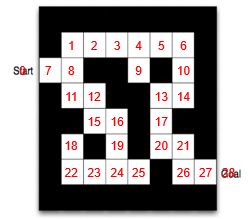

And below shows the optimal policy.

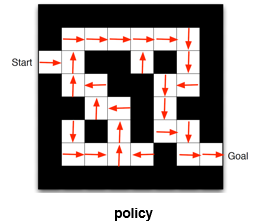

### 12. Compare learned policy with the **optimal policy**.

In [16]:
for i in range(28):    
    action_probs = pi(torch.from_numpy(np.eye(28)[i]).float()).detach().numpy()    
    print(action_probs)

[0.23367296 0.0956999  0.07273658 0.59789056]
[0.07293669 0.03592127 0.04855363 0.8425884 ]
[0.05462228 0.03118224 0.01486068 0.8993348 ]
[0.07666796 0.05425239 0.01722894 0.85185075]
[0.0443932  0.02527741 0.01195309 0.9183763 ]
[0.0665969  0.03275551 0.01139179 0.8892558 ]
[0.04861306 0.86651003 0.01050655 0.0743704 ]
[0.15144657 0.08733495 0.03014898 0.7310695 ]
[0.85643613 0.02253582 0.01755302 0.10347503]
[0.35170653 0.13421102 0.10129643 0.41278613]
[0.02802563 0.8467082  0.02735752 0.09790862]
[0.60258716 0.18049453 0.06248925 0.15442908]
[0.2478155  0.07012589 0.10740054 0.5746581 ]
[0.04462539 0.9152965  0.02051832 0.0195598 ]
[0.02354686 0.05604528 0.8350846  0.08532324]
[0.36737007 0.13130458 0.07352459 0.42780066]
[0.2599998  0.12516657 0.12191402 0.4929196 ]
[0.01457424 0.93531203 0.01336293 0.03675084]
[0.2268474  0.18767382 0.10311542 0.48236337]
[0.32633024 0.10481703 0.09481019 0.4740425 ]
[0.01030997 0.01230011 0.00932357 0.9680664 ]
[0.01620892 0.963305   0.00385893 

### **Congratulations**! You sucessfully trained a policy network.